In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
preprocesado = pd.read_csv(os.path.join("data","Datos_Proyecto_Aplica.csv"))

Gráfica de las peliculas más populares

Text(0.5, 1.0, 'Peliculas más populares')

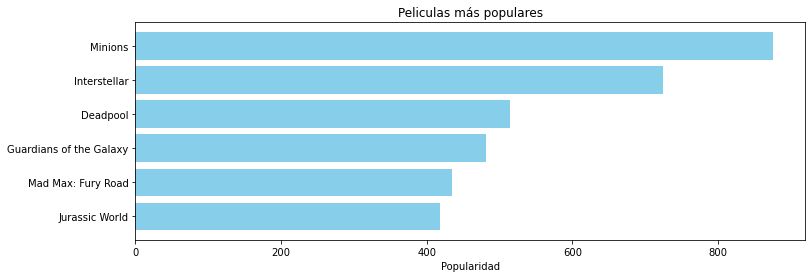

In [80]:
pop= preprocesado.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularidad")
plt.title("Peliculas más populares")

Veamos el top 10 películas con más votos y mejor valorados.

In [81]:
q_movies = preprocesado.sort_values('vote_count', ascending=False)
q_movies[['title', 'vote_count', 'vote_average']].head(20)

,title,vote_count,vote_average
96,Inception,13752,8.1
65,The Dark Knight,12002,8.2
0,Avatar,11800,7.2
16,The Avengers,11776,7.4
788,Deadpool,10995,7.4
95,Interstellar,10867,8.1
287,Django Unchained,10099,7.8
94,Guardians of the Galaxy,9742,7.9
426,The Hunger Games,9455,6.9
127,Mad Max: Fury Road,9427,7.2


In [82]:

q_movies = preprocesado.sort_values('vote_average', ascending=False)

q_movies[['title', 'vote_count', 'vote_average']].head(10)

,title,vote_count,vote_average
3519,Stiff Upper Lips,1,10.0
4247,Me You and Five Bucks,2,10.0
4045,"Dancer, Texas Pop. 81",1,10.0
4662,Little Big Top,1,10.0
3992,Sardaarji,2,9.5
2386,One Man's Hero,2,9.3
2970,There Goes My Baby,2,8.5
1881,The Shawshank Redemption,8205,8.5
2796,The Prisoner of Zenda,11,8.4
3337,The Godfather,5893,8.4


Aquí vemos que no son comparables los top, por lo que estableceremos la media geométrica entre estas para poder compararlas.

(array([4.124e+03, 3.910e+02, 1.470e+02, 7.100e+01, 3.700e+01, 1.400e+01,
        1.100e+01, 4.000e+00, 3.000e+00, 1.000e+00]),
 array([    0. ,  1375.2,  2750.4,  4125.6,  5500.8,  6876. ,  8251.2,
         9626.4, 11001.6, 12376.8, 13752. ]),
 <BarContainer object of 10 artists>)

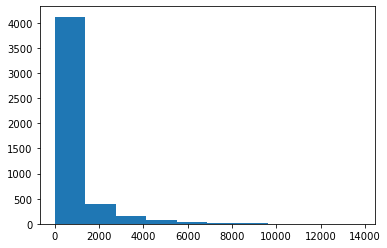

In [83]:
# esta sesgado
plt.hist(preprocesado["vote_count"])

In [84]:
preprocesado["Score"]= np.sqrt(preprocesado["vote_average"]* preprocesado["vote_count"])

In [85]:

q_movies = preprocesado.sort_values('Score', ascending=False)

q_movies[['title', 'vote_count', 'vote_average','Score']].head(30)

,title,vote_count,vote_average,Score
96,Inception,13752,8.1,333.753202
65,The Dark Knight,12002,8.2,313.713882
95,Interstellar,10867,8.1,296.686198
16,The Avengers,11776,7.4,295.198916
0,Avatar,11800,7.2,291.478987
788,Deadpool,10995,7.4,285.242003
287,Django Unchained,10099,7.8,280.663856
662,Fight Club,9413,8.3,279.513685
94,Guardians of the Galaxy,9742,7.9,277.419898
634,The Matrix,8907,7.9,265.264585


In [12]:
def lista_recomendados(idx , col):
    
    #Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
    tfidf = TfidfVectorizer(stop_words='english')
    #Replace NaN with an empty string
    preprocesado[col] = preprocesado[col].fillna('')
    #Construct the required TF-IDF matrix by fitting and transforming the data
    tfidf_matrix = tfidf.fit_transform(preprocesado[col])
    # Compute the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return sim_scores

In [165]:
lista_recomendados(65,'overview')

[(3, 0.30151176591665485),
 (428, 0.24943052490782133),
 (3854, 0.22451581982034283),
 (299, 0.21407005730021642),
 (1359, 0.18233430984787807),
 (119, 0.16203671480953252),
 (1181, 0.13462679652302015),
 (9, 0.11863736843799158),
 (2507, 0.1137383532501324),
 (210, 0.10689597818735441)]

## Kmeans con variables numericas

In [84]:
numeric_features = list(preprocesado.dtypes[preprocesado.dtypes != "object"].index)
numericas_prepro=preprocesado[numeric_features].iloc[:,1:].drop(["id","vote_average","vote_count"],axis=1)

In [85]:
#imputamos por el promedio los dos perdidos
is_NaN = numericas_prepro.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = numericas_prepro[row_has_NaN]
numericas_prepro.loc[numericas_prepro[row_has_NaN].index,"runtime"]= numericas_prepro.runtime.mean()

<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

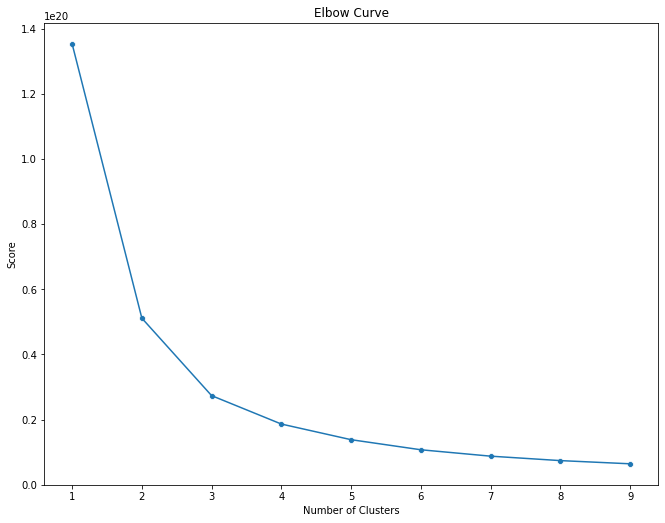

In [65]:
# implementación de la regla del codo
from sklearn.cluster import KMeans

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(numericas_prepro.iloc[:,1:]).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

In [66]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(numericas_prepro.iloc[:,1:])

In [28]:
np.unique(kmeans.labels_)

array([0, 1, 2])

In [29]:
kmeans.predict([numericas_prepro.iloc[96,1:]])

array([2])

## Análisis de otras variables.

In [154]:
import ast
generos=[]
for i in preprocesado.genres:
    i=ast.literal_eval(i)
    for j in i:
        if j not in generos:
            generos.append(j)

In [155]:
generos

['Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TV Movie']

production_companies

In [117]:
import ast
prod_comp=[]
for i in preprocesado.production_companies:
    i=ast.literal_eval(i)
    for j in i:
        if j not in prod_comp:
            prod_comp.append(j)

In [118]:
len(prod_comp)

5017

paises_prod

In [121]:
import ast
prod_count=[]
for i in preprocesado.production_countries:
    i=ast.literal_eval(i)
    for j in i:
        if j not in prod_count:
            prod_count.append(j)
len(prod_count)

88

idiomas

In [122]:

import ast
leng=[]
for i in preprocesado.spoken_languages:
    i=ast.literal_eval(i)
    for j in i:
        if j not in leng:
            leng.append(j)
len(leng)

62

In [3]:
def top_inter(indice_pelicula):
    top=[]
    generos_pelicula    = ast.literal_eval(preprocesado.genres[indice_pelicula]              )
    prod_pelicula       = ast.literal_eval(preprocesado.production_companies[indice_pelicula])
    prod_pais_pelicula  = ast.literal_eval(preprocesado.production_countries[indice_pelicula])
    leng_pelicula       = ast.literal_eval(preprocesado.spoken_languages[indice_pelicula]    )
    
    for i in range(preprocesado.shape[0]):
        generos_2_peliculas   = ast.literal_eval(preprocesado.genres[i]              )
        prod_2_peliculas      = ast.literal_eval(preprocesado.production_companies[i])
        prod_pais_2_peliculas = ast.literal_eval(preprocesado.production_countries[i])
        leng_2_pelicula       = ast.literal_eval(preprocesado.spoken_languages[i]    )
        
        
        interseccion_gen       = len(list(set(generos_pelicula)   & set(generos_2_peliculas  )))
        interseccion_prod      = len(list(set(prod_pelicula)      & set(prod_2_peliculas     )))
        interseccion_prod_pais = len(list(set(prod_pais_pelicula) & set(prod_pais_2_peliculas)))
        interseccion_leng      = len(list(set(leng_pelicula)      & set(leng_2_pelicula      )))
        
        top.append([i,preprocesado.title[i],interseccion_gen, int(interseccion_prod),int(interseccion_prod_pais), int(interseccion_leng)])
        
    top_df =pd.DataFrame(data=np.array(top),columns=["pelicula_fila","title","generos_en_comun","productora_en_comun","pais_prod_en_comun","idiomas_en_comun"])
    top_df["productora_en_comun"]=top_df["productora_en_comun"].astype(int)
    top_df["generos_en_comun"]=top_df["generos_en_comun"].astype(int)
    top_df["pelicula_fila"]=top_df["pelicula_fila"].astype(int)
    
    return top_df[(top_df["generos_en_comun"] >0 )& (top_df["productora_en_comun"]> 0 )]

#top_df[(top_df["generos_en_comun"]== top_df["generos_en_comun"].max() )& (top_df["productora_en_comun"]> top_df["productora_en_comun"].mean()) ]
        
    

In [124]:
top_inter(65)

,pelicula_fila,title,generos_en_comun,productora_en_comun,pais_prod_en_comun,idiomas_en_comun
3,3,The Dark Knight Rises,4,4,1,1
9,9,Batman v Superman: Dawn of Justice,1,3,1,1
10,10,Superman Returns,1,3,1,1
14,14,Man of Steel,1,4,2,1
28,28,Jurassic World,2,1,1,1
...,...,...,...,...,...,...
3911,3911,Krush Groove,1,1,1,1
4172,4172,A Streetcar Named Desire,1,1,1,1
4267,4267,Batman,1,1,1,1
4312,4312,The Charge of the Light Brigade,2,1,1,1


(array([2.000e+00, 1.000e+01, 2.200e+01, 3.100e+01, 5.200e+01, 8.900e+01,
        2.290e+02, 4.600e+02, 1.804e+03, 2.103e+03]),
 array([-19477. , -15809.3, -12141.6,  -8473.9,  -4806.2,  -1138.5,
          2529.2,   6196.9,   9864.6,  13532.3,  17200. ]),
 <BarContainer object of 10 artists>)

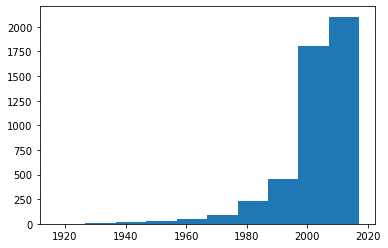

In [126]:
plt.hist(pd.to_datetime(preprocesado.release_date))

In [94]:
def fechas_limites(indice_pelicula):
    peliculas_cercanas=[]
    fecha=pd.to_datetime(preprocesado.release_date)
    fecha_pelicula= fecha[indice_pelicula]
    for i in range(fecha.shape[0]):
        if fecha[i].year +15 >fecha_pelicula.year and fecha[i].year-15 <fecha_pelicula.year:
            peliculas_cercanas.append([i,fecha[i],preprocesado.title[i]])
    peliculas_cercanas =pd.DataFrame(data=np.array(peliculas_cercanas),columns=["pelicula_fila","fecha","title"])
    return peliculas_cercanas
            

In [95]:
fechas_limites(65)

,pelicula_fila,fecha,title
0,0,2009-12-10,Avatar
1,1,2007-05-19,Pirates of the Caribbean: At World's End
2,2,2015-10-26,Spectre
3,3,2012-07-16,The Dark Knight Rises
4,4,2012-03-07,John Carter
...,...,...,...
4127,4797,2005-03-12,Cavite
4128,4799,2011-12-26,Newlyweds
4129,4800,2013-10-13,"Signed, Sealed, Delivered"
4130,4801,2012-05-03,Shanghai Calling


In [5]:
def find_director(indice_pelicula):
    crew_pel = ast.literal_eval(preprocesado.job[indice_pelicula])
    for i in range(len(crew_pel)):
        if crew_pel[i] == 'Director':
            break
    director_por_buscar = ast.literal_eval(preprocesado.name_crew[indice_pelicula])[i]
    df_aux= preprocesado[preprocesado[['name_crew']].applymap(lambda x: director_por_buscar in x ).name_crew]
    return df_aux[['title', 'Unnamed: 0']].rename(columns = {'Unnamed: 0': 'pelicula_fila'})
    

In [6]:
def find_actores(indice_pelicula):
    aux = []
    actores = set(ast.literal_eval(preprocesado.name_cast[indice_pelicula])[:10])
    for i in range(preprocesado.shape[0]):
        condicion = list((i,preprocesado.title[i], len(actores & set(ast.literal_eval(preprocesado.name_cast[i])[:10]))))
        if preprocesado.title[i] != preprocesado.title[indice_pelicula]:
            aux.append( condicion )
    df_aux = pd.DataFrame(data = np.array(aux), columns= ['pelicula_fila','title','actores_comunes'])
    df_aux["actores_comunes"] = df_aux["actores_comunes"].astype(int)
    df_aux["pelicula_fila"] = df_aux["pelicula_fila"].astype(int)
    return  df_aux[ df_aux.actores_comunes > 0]

#df_aux[ df_aux.actores_comunes >=  df_aux.actores_comunes.mean()]

In [7]:
def juntar(df1, df2, df3):
    #Asumimos que df1: top_inter, df2: find_actores, df3: find_director
    pel_fil = set()
    data= pd.DataFrame(columns=['pelicula_fila', 'title', 'generos_en_comun', 'productora_en_comun',
       'pais_prod_en_comun', 'idiomas_en_comun', 'actores_comunes', 'director_en_comun'])
    
    for x in df1.pelicula_fila:
        pel_fil.add(x)
    
    for x in df2.pelicula_fila:
        pel_fil.add(x)
        
    for x in df3.pelicula_fila:
        pel_fil.add(x)
    
    for i in list(pel_fil):
        if i in list(df1.pelicula_fila):
            a= list(df1.loc[i, ['pelicula_fila', 'title', 'generos_en_comun', 'productora_en_comun',
       'pais_prod_en_comun', 'idiomas_en_comun']])
            if i in list(df2.pelicula_fila):
                a= a+ list(df2[df2['pelicula_fila']==i].actores_comunes)
                if i in list(df3.pelicula_fila):
                    a+=[1]
                else:
                    a+=[0]
            else:
                a+= [0]
                if i in list(df3.pelicula_fila):
                    a+=[1]
                    data.loc[i]=a
                else:
                    a+=[0]
                    data.loc[i]=a
        else:
            if i in list(df2.pelicula_fila):
                a= [i] + list(df2[df2['pelicula_fila']==i].title) +[0, 0, 0 ,0]
            else:
                a= [i] + list(df3[df3['pelicula_fila']==i].title) +[0, 0, 0 ,0]
            if i in list(df2.pelicula_fila):
                a+= list(df2[df2['pelicula_fila']==i].actores_comunes)
                if i in list(df3.pelicula_fila):
                    a+=[1]
                    data.loc[i]=a
                else:
                    a+=[0]
                    data.loc[i]=a
            else:
                a+= [0]
                if i in list(df3.pelicula_fila):
                    a+=[1]
                    data.loc[i]=a
                else:
                    a+=[0]
                    data.loc[i]=a
    
    
    return data

In [8]:
def concatenar(indice_pelicula):
    df_aux = juntar(top_inter(indice_pelicula), find_actores(indice_pelicula), find_director(indice_pelicula))
    for i in df_aux.columns[2:-2]:
        df_aux[i] = df_aux[i].astype(int)
    
    df_aux['score'] = df_aux[['generos_en_comun', 'productora_en_comun', 'pais_prod_en_comun', 'idiomas_en_comun','actores_comunes']].sum(axis = 1)
    
    return df_aux[['pelicula_fila','title','score', 'director_en_comun']].sort_values(by=['score'], ascending=False)

In [135]:
numeric_features

['Unnamed: 0',
 'movie_id',
 'budget',
 'id',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count',
 'Score']

>Hasta ahora contamos con los siguientes recomendadores (Cosenosimilaridad de texto):

1) overview \
2) keywords \
3) Title + Tagline

>Tenemos clusters generados por K-mean generado a través de todas la variables numéricas asociados a cada película:

1) budget \
2) popularity \
3) revenue \
4) runtime \
5) vote_average \
6) vote_count \
7) Score (Promedio geometrico entre 5 y 6.) 

>Tenemos un filtro por fecha con restricción de 15 años de diferencia.

>Contamos con un filtro que trabaja con el lenguaje original de la película.

>Finalmente contamos con una variable binaria que considera si dos películas tienes director en común y un score que considera la suma de los siguientes aspectos con respecto a una pelicula:

1) generos_en_comun : Considera cuando dos películas son del mismo género \
2) productora_en_comun : Considera cuando dos películas fueran producidas por la misma productora \
3) pais_prod_en_comun : Considera el país o los paises en comín donde dos peliculas llevaron a cabo su rodaje \
4) idiomas_en_comun : Considera cuando dos películas tiene el mismo idioma de origen en común. \
5) actores_comunes : Considera cunado dos películas tienen actores en común dentro de sus 10 papeles más protagonicos.


Dado el titula de una pelicula a para la cual se le busca asociar recomnendaciones ($T_o$), buscamos dentro de las peliculas disponibles ($T_c$) cual obtiene el mejor score cuya formula viene dada por: 

$$f_{score}(T_o,T_c)=0.5 \times Texto(T_o,T_c)+0.3 \times Kmeans(T_o,T_c) +0.2 \times Comunes(T_o,T_c) + Bonus(T_o,T_c)$$ \
Donde:
1) $Texto(T_o,T_c)$ es el nivel de similaridad que tiene la pelicula que se esta chequeando $T_c$ con respecto a las variables de texto (Proomedio)
2) $Kmeans(T_o,T_c)$ considera una variable binaria si se encuentran en el mismo cluster
3) $Comunes(T_o,T_c)$ Toma en cuenta el nivel de similaridad entre dos peliculas con respecto a los puntos 1-5 y sumado a esto una variable binaria que detecta cuando dos peliuclas tienen directo en comun (lo cual se beneficia con un multiplicador de 2 para este puntaje).
4) $Bonus(T_o,T_c)$ Considera aspectos adicionales, para los cuales se puede obtener un $10%$ de aumento sobre el puntaje final sobre el bonus y un $%5$ de aumento sobre el puntaje final previo al bonus cuando ambas peliculas cuentan con el mismo lenguaje original.

In [9]:
indices = pd.Series(preprocesado.index, index=preprocesado['title']).drop_duplicates()

In [10]:
indices['The Dark Knight Rises']

3

In [13]:
lista_recomendados(65,'overview')[1]

(428, 0.24943052490782133)

In [56]:
def text_score(idx):
    result=list()
    L_o=lista_recomendados(idx,'overview')
    mov_over = set([i[0] for i in L_o])
    score_over= [i[1] for i in L_o]
    L_k=lista_recomendados(idx,'keywords')
    mov_key = set([i[0] for i in L_k])
    score_key=[i[1] for i in L_k]
    L_mt=lista_recomendados(idx,'movies+tagline')
    mov_mt = set([i[0] for i in L_mt])
    score_mt=[i[1] for i in L_mt]
    mov_fin = mov_over|mov_key|mov_mt
    for i  in mov_fin:
        text=0
        if i in mov_over:
            text+=1/score_over[list(mov_over).index(i)]
        if i in mov_key:
            text+=1/score_key[list(mov_key).index(i)]  
        if i in mov_mt:
            text+=1/score_mt[list(mov_mt).index(i)]
        result.append([i,text/3])
    
    data= [[i[1]] for i in result]
    scaler = MinMaxScaler()
    scaler.fit(data)
    escalado = scaler.transform(data)
    
    escalado_2 = [i[0] for i in escalado]
    
    df = pd.DataFrame()
    
    df['pelicula_fila'] = list(mov_fin)
    df['score'] = escalado_2
    return df
            

In [88]:
text_score(65)

,pelicula_fila,score
0,3,0.404016
1,9,0.339271
2,2507,0.276578
3,1995,0.004635
4,3854,0.334002
5,1359,0.686643
6,14,0.032019
7,1296,0.072871
8,210,0.777491
9,1143,0.030878


In [58]:
from sklearn.preprocessing import MinMaxScaler


def Comunes(indice_pelicula):
    scaler = MinMaxScaler()
    df_aux = concatenar(indice_pelicula)
    mask = list(df_aux.director_en_comun > 0)
    df_aux.loc[mask,('score')] = df_aux.score[mask] * 2
    data = [[i] for i in df_aux.score]
    scaler.fit(data)
    df_aux.score = scaler.transform(data)
    return df_aux

In [89]:
Comunes(65)

,pelicula_fila,title,score,director_en_comun
65,65,The Dark Knight,1.000000,1
14,14,Man of Steel,0.615385,1
1892,1892,The Losers,0.307692,0
758,758,Edge of Darkness,0.269231,0
164,164,Lethal Weapon 4,0.269231,0
...,...,...,...,...
1043,1043,Miss Congeniality,0.038462,0
191,191,Harry Potter and the Prisoner of Azkaban,0.038462,0
4099,4099,Harsh Times,0.038462,0
1033,1033,Insomnia,0.000000,1


In [86]:
def KMeans_s(indice_pelicula):
  
    mask = []
    cluster_pelicula = kmeans.predict([numericas_prepro.iloc[indice_pelicula,1:]])[0]
    for i in range(numericas_prepro.shape[0]):
        if kmeans.predict([numericas_prepro.iloc[i,1:]])[0] == kmeans.predict([numericas_prepro.iloc[indice_pelicula,1:]])[0]:
            mask.append(True)
        else:
            mask.append(False)
    return numericas_prepro.iloc[mask].index

In [92]:
6 in KMeans_s(65)

True

In [143]:
t_s = text_score(65)
t_s[t_s['pelicula_fila']==119].score.values

array([1.])

In [144]:
t_s[t_s['pelicula_fila']==119].score.values[0]

1.0

In [243]:
def recomendador_final(nombre_pelicula):
    indice_pelicula = preprocesado.title.values.tolist().index(nombre_pelicula)
    dic = dict()
    t_s = text_score(indice_pelicula)
    com = Comunes(indice_pelicula)
    km= KMeans_s(indice_pelicula)
    fl = fechas_limites(indice_pelicula)
    lenguaje= preprocesado.original_language[indice_pelicula]
    
    for i in range(preprocesado.shape[0]):
        
        if i in list(t_s.pelicula_fila):
            dic[i] = t_s[t_s['pelicula_fila']==i].score.values[0]*0.9
            
        if i in com.pelicula_fila:
            if i in dic.keys():
                dic[i] += com[com['pelicula_fila']==i].score.values[0]*0.5
            else:
                dic[i] = com[com['pelicula_fila']==i].score.values[0]*0.5
        
        if i in list(km) :
            if i in dic.keys():
                dic[i] += dic[i]*0.5

        if i in list(fl.pelicula_fila):
            if i in dic.keys():
                dic[i] += dic[i]*0.4
            
        if lenguaje == preprocesado.original_language[i]:
            if i in dic.keys():
                dic[i] += dic[i]*0.05
        #if i%200 == 0: 
            #print(round(i/preprocesado.shape[0]*100,2))
    df = pd.DataFrame()
    
    df['pelicula_fila'] = list(dic.keys())
    df['scores'] = list(dic.values())
    df_f= df.sort_values(by=['scores'], ascending=False).iloc[:20,:]
    df_f['title'] = preprocesado.title[df_f.pelicula_fila].values
    
    #df_f.set_index('pelicula_fila')
    #df_f.drop(index = indice_pelicula, axis=0)
    
    if indice_pelicula in list(df_f.pelicula_fila.values):
        ind= list(df_f['pelicula_fila']).index(indice_pelicula)
        df_f = df_f.drop([ind])
    return df_f

In [244]:
recomendador_final('The Dark Knight Rises')

,pelicula_fila,scores,title
29,119,1.323000,Batman Begins
0,3,1.102500,The Dark Knight Rises
44,210,1.023390,Batman & Robin
13,65,0.920153,The Dark Knight
231,1359,0.848702,Batman
3,14,0.771750,Man of Steel
415,3854,0.589953,"Batman: The Dark Knight Returns, Part 2"
28,116,0.552876,I Am Legend
78,428,0.534125,Batman Returns
59,303,0.494204,Catwoman


In [183]:
preprocesado.title[[1,3]].values

array(["Pirates of the Caribbean: At World's End",
       'The Dark Knight Rises'], dtype=object)

In [163]:
dat= recomendador_final(65)

In [169]:
dat.sort_values(by=['scores'], ascending=False)

,pelicula_fila,scores
25,119,0.577500
40,210,0.502309
224,1359,0.400872
1,9,0.393307
204,1181,0.315049
...,...,...
269,1787,0.008077
289,1995,0.002677
334,2474,0.000000
389,3573,0.000000


In [181]:
preprocesado.title.values.tolist().index('Avatar')

0